## Описание задачи

Автостраховая компания хочет установить конкурентоспособные цены на автострахование, что подразумевает наличие выгодной модели для клиентов, подверженных риску попасть в аварию. Необходимо на основании данных о клиентах спрогнозировать вероятность подачи заявления на страховые выплаты.  
База данных: https://www.kaggle.com/datasets/racholsan/customer-data  
Задача является задачей бинарной классификации (с целевой переменной outcome: True - заявление было подано, False - нет).

## Импорт необходимых библиотек

In [274]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn import preprocessing

## Чтение данных

In [276]:
data = pd.read_csv("customer-data.csv")
data

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,10238,12000.0,sedan,0,0,0,False
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,10238,16000.0,sedan,0,0,0,True
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,10238,11000.0,sedan,0,0,0,False
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,32765,11000.0,sedan,0,0,0,False
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,32765,12000.0,sedan,2,0,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,True,before 2015,False,False,10238,16000.0,sedan,0,0,1,False
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,True,after 2015,False,True,32765,NaN,sedan,1,0,0,False
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,True,before 2015,False,True,10238,14000.0,sedan,0,0,0,False
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,False,before 2015,False,True,10238,13000.0,sedan,2,0,1,True


In [277]:
data.columns

Index(['id', 'age', 'gender', 'race', 'driving_experience', 'education',
       'income', 'credit_score', 'vehicle_ownership', 'vehicle_year',
       'married', 'children', 'postal_code', 'annual_mileage', 'vehicle_type',
       'speeding_violations', 'DUIs', 'past_accidents', 'outcome'],
      dtype='object')

### Клиент характеризуется 19 признаками:
1. id - уникальный идентификатор (номер клиента)
2. age - возраст (16-25 лет, 26-39 лет, 40-64 лет, 65+ лет)
3. gender - пол
4. race - принадлежность к расовой группе (majority, minority)
5. driving_experience - опыт вождения (0-9 лет, 10-19 лет, 20-29 лет, 30+ лет)
6. education - уровень образования (high school, university, none)
7. income - уровень дохода (upper class, middle class, poverty, working class)
8. credit_score - оценка платежеспособности (уровень доверия к клиенту)
9. vehicle_ownership - владение транспортным средством
10. vehicle_year - год выпуска автомобиля (до 2015 г., после 2015 г.)
11. married - состоит в браке
12. children - наличие детей
13. postal_code - почтовый индекс
14. annual_mileage - годовой пробег автомобиля
15. vehicle_type - тип автомобиля (седан, спорткар)
16. speeding_violations - количество штрафов за превышение скорости
17. DUIs - количество штрафов за вождение в нетрезвом состоянии
18. past_accidents - количество инцидентов в прошлом
19. outcome - факт обращения за страховыми выплатами

Заменим типы столбцов с категориальными значениями на специальный, предназначенный для хранения категориальных значений тип данных:

In [280]:
categorial = ["age", "gender", "race", "driving_experience", "education", "income", "vehicle_year", "vehicle_type"]

for feature in categorial:
    data[feature] = data[feature].astype('category')

data.dtypes

id                        int64
age                    category
gender                 category
race                   category
driving_experience     category
education              category
income                 category
credit_score            float64
vehicle_ownership          bool
vehicle_year           category
married                    bool
children                   bool
postal_code               int64
annual_mileage          float64
vehicle_type           category
speeding_violations       int64
DUIs                      int64
past_accidents            int64
outcome                    bool
dtype: object

## Разведочный анализ данных

Построим гистограммы распределения характеристик клиентов:

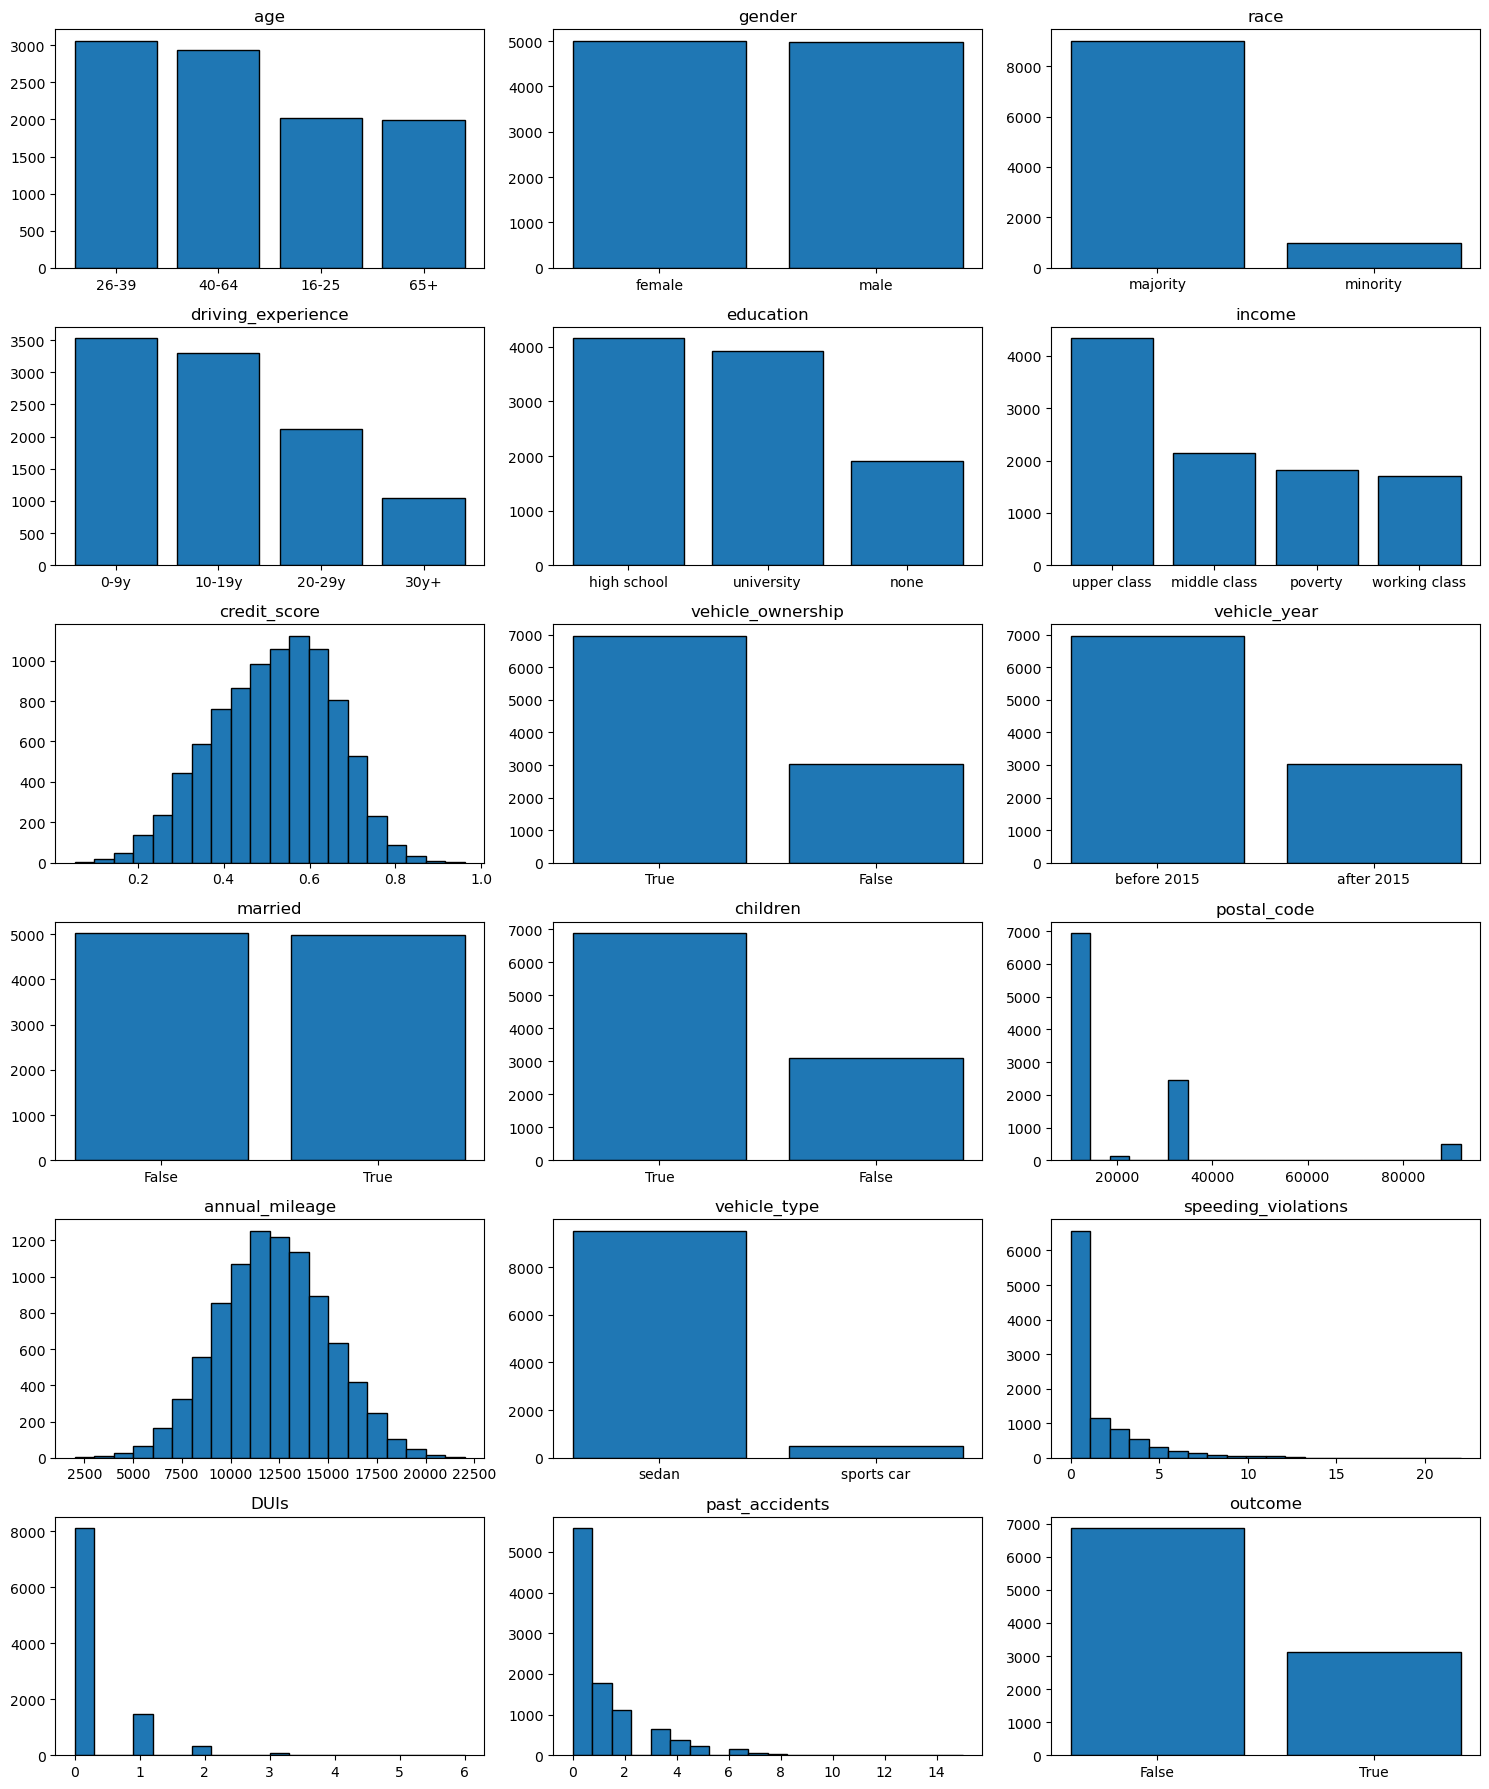

In [283]:
fig, axs = plt.subplots(6, 3, figsize=(15, 18))

features = list(data.columns)[1:]

for ax, feature in zip(axs.flatten(), features):
    if data[feature].dtype in [bool, "category"]:
        counts = data[feature].value_counts()
        ax.bar(counts.index.astype(str), counts.values, edgecolor='k')
        ax.set_title(feature)
        continue

    ax.hist(data[feature].dropna(), bins=20, edgecolor='k')
    ax.set_title(feature)

plt.tight_layout()
plt.show()

Преобразуем значения бинарных признаков (True в 1 и False в 0):

In [285]:
binary = ["vehicle_ownership", "married", "children"]

for feature in binary:
    data[feature] = data[feature].apply(lambda value: 1 if value else 0)

Вычислим основные статистические характеристики категориальных признаков:

In [287]:
data[categorial].describe()

,age,gender,race,driving_experience,education,income,vehicle_year,vehicle_type
count,10000,10000,10000,10000,10000,10000,10000,10000
unique,4,2,2,4,3,4,2,2
top,26-39,female,majority,0-9y,high school,upper class,before 2015,sedan
freq,3063,5010,9012,3530,4157,4336,6967,9523


И для количественных и бинарных признаков:

In [289]:
not_categorial = [feat for feat in list(data.columns) if feat not in categorial]
data[not_categorial].describe()

,id,credit_score,vehicle_ownership,married,children,postal_code,annual_mileage,speeding_violations,DUIs,past_accidents
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000


- Среди клиентов компании больше всего клиентов в возрасте от 26 до 39 лет, примерно столько же клиентов от 40 до 64 лет, клиентов остальных возрастов заметно меньше.  
- Мужчин и женщин среди клиентов компании примерно одинаковое количество.  
- По рассовой принадлежности значительно больше клиентов из группы majority (самая распространенная раса).  
- Чем больше стаж вождения, тем меньше клиентов.  
- По уровню образования больше всего людей, закончивших только старшую школу, чуть меньше людей с университетским образованием, есть также люди без образования.  
- По уровню дохода больше всего клиентов высшего класса, остальных клиентов из среднего класса, рабочих и бедных примерно равное количество.  
- Распределения кредитного рейтинга и годового пробега автомобилей визуально напоминают нормальные. У 75% клиентов кредитный рейтинг не больше 0.62, среднее значение годового пробега автомобиля около 11700.  
- Примерно одинаково распределены характеристики наличия автомобиля и года выпуска автомобиля (преобладают клиенты с автомобилем, год выпуска большинства автомобилей раньше 2015 г.).  
- Преобладают клиенты с детьми, при этом состоящих в браке клиентов примерно половина.  
- Среди типов автомобилей преобладают седаны, спортивных машин очень мало.  
- Среди количества нарушений и количества обращений за выплатами больше всего нулей, нарушений скорости больше, чем вождений в нетрезвом состоянии. Максимальное число штрафов за превышение - 22, за нетрезвое состояние - 6. Максимальное число обращений за страховыми выплатами - 15.  
- Из всех клиентов примерно треть подали заявление на страховые выплаты (классы несбалансированы).

Построим корреляционную матрицу для некатегориальных (количественных и бинарных признаков):

In [292]:
data_corr = data[not_categorial].corr()
data_corr

,id,credit_score,vehicle_ownership,married,children,postal_code,annual_mileage,speeding_violations,DUIs,past_accidents,outcome
id,1.000000,0.001704,0.009197,0.014826,0.001233,0.006038,-0.002217,0.008156,0.009268,0.001831,-0.010506
credit_score,0.001704,1.000000,0.312037,0.281238,0.220658,0.009040,-0.174453,0.204542,0.127366,0.180978,-0.325286
vehicle_ownership,0.009197,0.312037,1.000000,0.175626,0.125990,-0.004866,-0.097433,0.133868,0.086567,0.119521,-0.378921
married,0.014826,0.281238,0.175626,1.000000,0.287009,0.012045,-0.462193,0.218855,0.120840,0.215269,-0.262104
children,0.001233,0.220658,0.125990,0.287009,1.000000,0.020911,-0.447655,0.220415,0.115354,0.206295,-0.232835
postal_code,0.006038,0.009040,-0.004866,0.012045,0.020911,1.000000,-0.133978,0.113686,0.038492,-0.116985,0.095889
annual_mileage,-0.002217,-0.174453,-0.097433,-0.462193,-0.447655,-0.133978,1.000000,-0.323547,-0.116598,-0.195217,0.187154
speeding_violations,0.008156,0.204542,0.133868,0.218855,0.220415,0.113686,-0.323547,1.000000,0.359838,0.443074,-0.291862
DUIs,0.009268,0.127366,0.086567,0.120840,0.115354,0.038492,-0.116598,0.359838,1.000000,0.259359,-0.189352
past_accidents,0.001831,0.180978,0.119521,0.215269,0.206295,-0.116985,-0.195217,0.443074,0.259359,1.000000,-0.311495


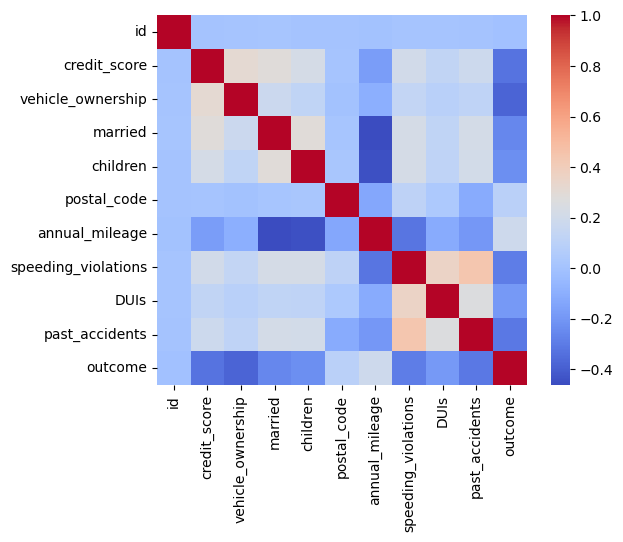

In [293]:
sns.heatmap(data_corr, square=True, cmap='coolwarm')
pass

Наблюдаем среднюю положительную корреляцию между количествами нарушений скоростного режима и вождением в нетрезвом состоянии, а также корреляцию этих нарушений с количеством инцидентов.  
Также можно отметить среднюю отрицательную корреляцию годового пробега автомобиля с фактами состояния в браке и наличия детей.  
Целевая переменная outcome отрицательно коррелирует с кредитным рейтингом, нарушениями и фактами состояния в браке и наличия детей.
Сильно коррелированных признаков нет.

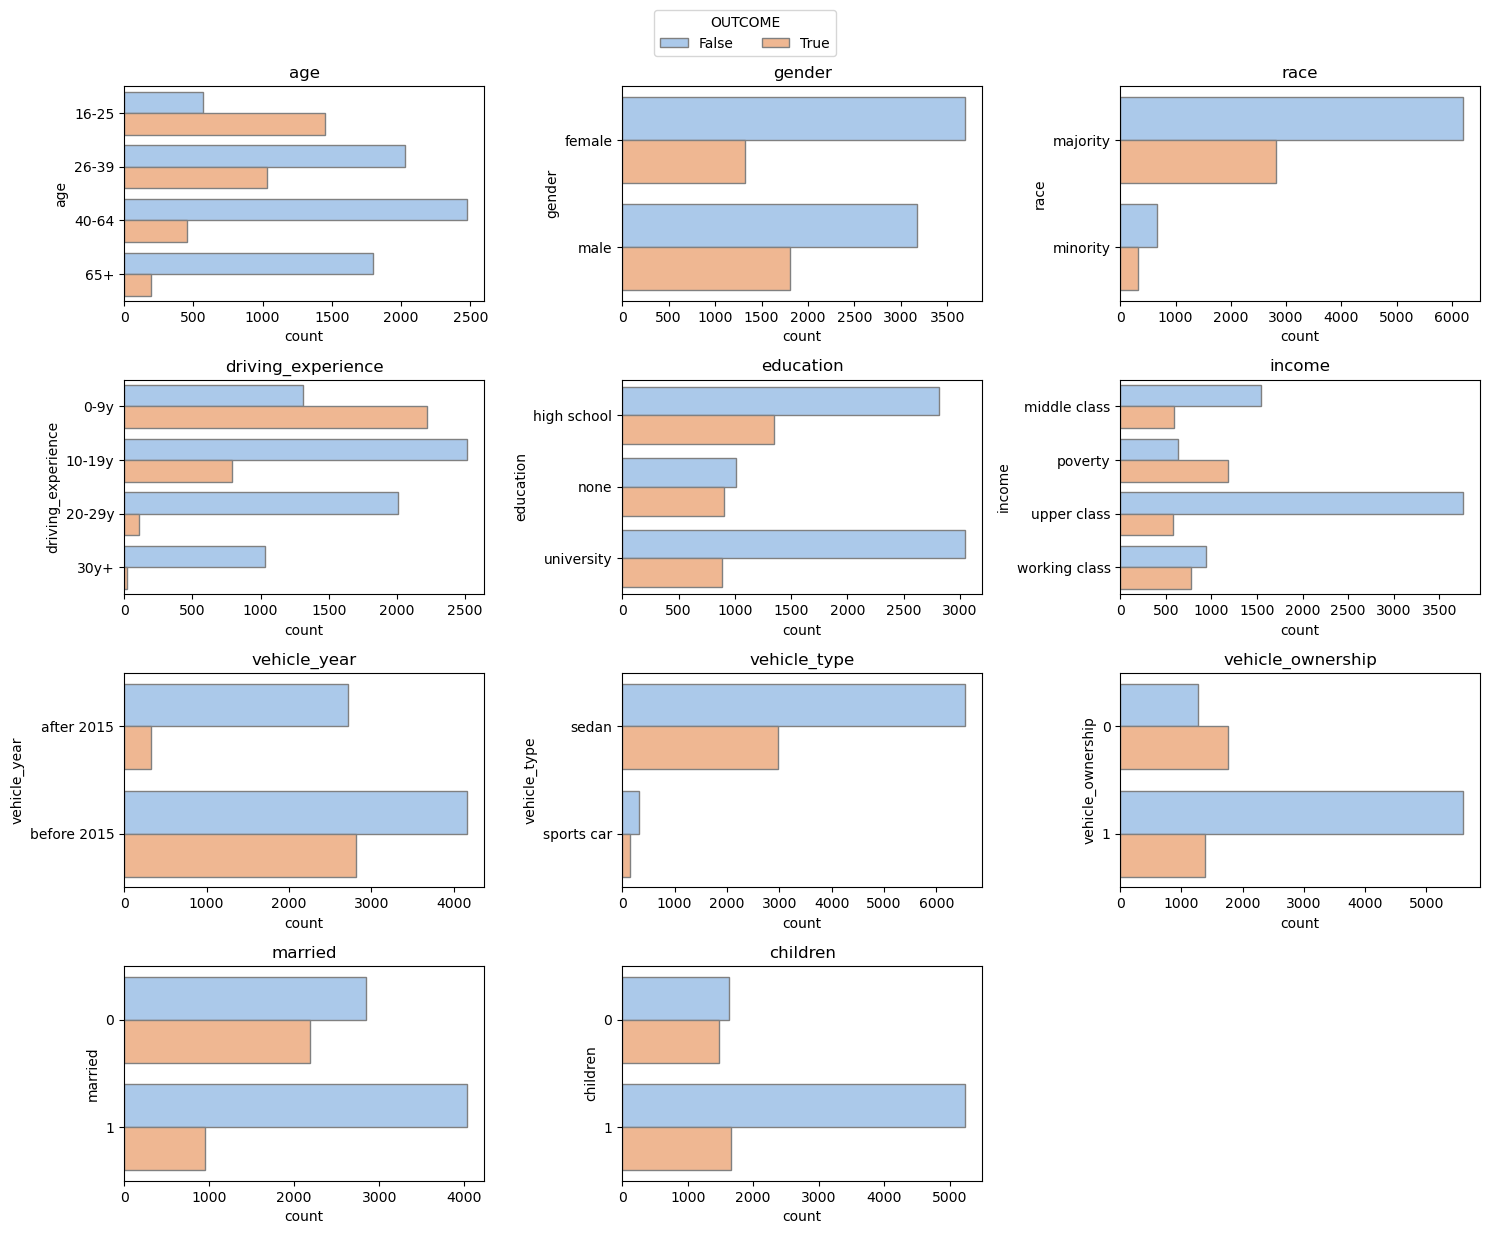

In [295]:
fig, axs = plt.subplots(4, 3, figsize=(15, 12))

handles = None
labels = None

for ax, feature in zip(axs.flatten(), categorial + binary):
    plot = sns.countplot(y=feature, hue="outcome", ax=ax, edgecolor = 'grey', palette="pastel", data=data)
    ax.set_title(feature)

    if handles is None:
        handles, labels = plot.get_legend_handles_labels()

    ax.legend_.remove()

for ax in axs.flatten()[len(categorial + binary):]:
    ax.set_visible(False)

fig.legend(handles, labels, title="OUTCOME", loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.03))
plt.tight_layout(rect=(0, 0, 1, 0.99))
plt.show()

- Молодые люди (16-25 лет) чаще обращаются за страховыми выплатами, с возрастом количество обращений уменьшается (появляется опыт). Аналогичные выводы для опыта вождения.
- Женщины реже обращаются за страховыми выплатами (водят более аккуратно).
- Обращения за страховыми выплатами не зависят от расовой принадлежности и типа автомобиля.
- Чем выше уровень образования и уровень дохода, тем реже обращения за страховыми выплатами.
- Если машина новая (младше 2015 г.), ее водитель реже обратится за страховыми выплатами (водит аккуратнее или обусловлено меньшим износом автомобиля).
- На собственных машинах клиенты менее вероятно обратятся за страховыми выплатами.
- Люди в браке и с детьми реже обращаются за страховыми выплатами (водят более аккуратно).

Из датасета можно удалить столбцы id и postal_code, так как они не влияют на целевую переменную напрямую. После этого удалим получившиеся дубликаты и преобразуем целевую переменную outcome в бинарный тип:

In [298]:
data = data.drop(columns=["id", "postal_code"])
print('Первоначальное кол-во данных:', data.shape[0])
data = data.drop_duplicates()
print('Кол-во данных после удаления дубликатов:', data.shape[0])
data.outcome = data.outcome.astype(int)

Первоначальное кол-во данных: 10000
Кол-во данных после удаления дубликатов: 9980


## Обработаем пропущенные значения

In [300]:
data.isnull().sum()

age                      0
gender                   0
race                     0
driving_experience       0
education                0
income                   0
credit_score           962
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
annual_mileage         952
vehicle_type             0
speeding_violations      0
DUIs                     0
past_accidents           0
outcome                  0
dtype: int64

В столбцах credit_score и annual_mileage чуть больше 9% пропущенных значений, заменим их на медиану:

In [302]:
data['credit_score'] = data['credit_score'].fillna(data['credit_score'].median())
data['annual_mileage'] = data['annual_mileage'].fillna(data['annual_mileage'].median())
data.isnull().sum()

age                    0
gender                 0
race                   0
driving_experience     0
education              0
income                 0
credit_score           0
vehicle_ownership      0
vehicle_year           0
married                0
children               0
annual_mileage         0
vehicle_type           0
speeding_violations    0
DUIs                   0
past_accidents         0
outcome                0
dtype: int64

## Обработаем категориальные признаки

In [304]:
data = pd.get_dummies(data, columns = [
    'age', 'gender', 'race', 'driving_experience', 'education', 'income', 'vehicle_year', 'married', 'children', 'vehicle_ownership', 'vehicle_type'],
                      drop_first=True, dtype=int)
data

,credit_score,annual_mileage,speeding_violations,DUIs,past_accidents,outcome,age_26-39,age_40-64,age_65+,gender_male,...,education_none,education_university,income_poverty,income_upper class,income_working class,vehicle_year_before 2015,married_1,children_1,vehicle_ownership_1,vehicle_type_sports car
0,0.629027,12000.0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,1,0
1,0.357757,16000.0,0,0,0,1,0,0,0,1,...,1,0,1,0,0,1,0,0,0,0
2,0.493146,11000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
3,0.206013,11000.0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,1,0,1,1,0
4,0.388366,12000.0,2,0,1,1,1,0,0,1,...,1,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.582787,16000.0,0,0,1,0,1,0,0,0,...,0,1,0,1,0,1,0,0,1,0
9996,0.522231,12000.0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,0
9997,0.470940,14000.0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,1,1,0
9998,0.364185,13000.0,2,0,1,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0


## Проведем нормализацию

In [306]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
data[['annual_mileage']] = scaler.fit_transform(data[['annual_mileage']]) # нормализация годового пробега автомобиля
data

,credit_score,annual_mileage,speeding_violations,DUIs,past_accidents,outcome,age_26-39,age_40-64,age_65+,gender_male,...,education_none,education_university,income_poverty,income_upper class,income_working class,vehicle_year_before 2015,married_1,children_1,vehicle_ownership_1,vehicle_type_sports car
0,0.629027,0.50,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,1,0
1,0.357757,0.70,0,0,0,1,0,0,0,1,...,1,0,1,0,0,1,0,0,0,0
2,0.493146,0.45,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
3,0.206013,0.45,0,0,0,0,0,0,0,1,...,0,1,0,0,1,1,0,1,1,0
4,0.388366,0.50,2,0,1,1,1,0,0,1,...,1,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.582787,0.70,0,0,1,0,1,0,0,0,...,0,1,0,1,0,1,0,0,1,0
9996,0.522231,0.50,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,0
9997,0.470940,0.60,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,1,1,0
9998,0.364185,0.55,2,0,1,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0


## Разобьем данные на обучающую и тестовую выборки

In [308]:
from sklearn.model_selection import train_test_split


y = data.outcome
X = data.drop(columns=['outcome'])

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=23)
X_train.shape[0], X_test.shape[0]

(7984, 1996)

## Запустим классификатор ближайших соседей

Будем смотреть также на метрики precision, recall и f1, так как они лучше отражают качество модели при несбалансированных классах.

In [311]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

print(f'Accuracy на обучающей выборке: {accuracy_score(y_train, y_train_predict)}')
print(f'Accuracy на тестовой выборке: {accuracy_score(y_test, y_test_predict)}')

precision = precision_score(y_test, y_test_predict)
recall = recall_score(y_test, y_test_predict)
f1 = f1_score(y_test, y_test_predict)

print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

print("\nМатрица ошибок:")
cm_knn = confusion_matrix(y_test, y_test_predict)
print(cm_knn)

Accuracy на обучающей выборке: 0.9996242484969939
Accuracy на тестовой выборке: 0.7615230460921844
Precision: 0.6266666666666667
Recall: 0.5987261146496815
F1: 0.6123778501628665

Матрица ошибок:
[[1144  224]
 [ 252  376]]


## Подберем оптимальное количество соседей

In [313]:
neighbours = [1, 2, 3, 4, 5, 7, 10, 15, 20, 25, 30]
table_acc = pd.DataFrame(columns=["Accuracy, train", "Accuracy, test", "Precision", "Recall", "F1"], index=neighbours)

for n in neighbours:    
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict  = model.predict(X_test)
    precision = precision_score(y_test, y_test_predict)
    recall = recall_score(y_test, y_test_predict)
    f1 = f1_score(y_test, y_test_predict)

    acc_train = accuracy_score(y_train, y_train_predict)
    table_acc.loc[n, "Accuracy, train"] = round(acc_train, 4)

    acc_test = accuracy_score(y_test, y_test_predict)
    table_acc.loc[n, "Accuracy, test"] = round(acc_test, 4)

    table_acc.loc[n, "Precision"] = round(precision, 4)
    table_acc.loc[n, "Recall"] = round(recall, 4)
    table_acc.loc[n, "F1"] = round(f1, 4)
    
table_acc  

,"Accuracy, train","Accuracy, test",Precision,Recall,F1
1,0.9996,0.7615,0.6267,0.5987,0.6124
2,0.8829,0.769,0.7263,0.4268,0.5376
3,0.8823,0.7926,0.6826,0.6369,0.659
4,0.8684,0.7921,0.7341,0.5318,0.6168
5,0.8677,0.7951,0.6853,0.6449,0.6645
7,0.8571,0.8006,0.6997,0.6417,0.6694
10,0.8471,0.8071,0.728,0.6178,0.6684
15,0.8406,0.8136,0.7169,0.6736,0.6946
20,0.8382,0.8171,0.7422,0.6417,0.6883
25,0.8376,0.8166,0.7323,0.6576,0.693


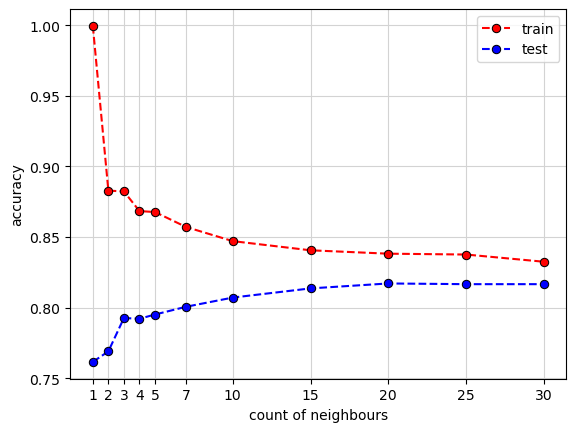

In [314]:
plt.plot(table_acc.index, table_acc["Accuracy, train"], '--o', color='r', markeredgecolor='k', markeredgewidth=0.75, label='train')
plt.plot(table_acc.index, table_acc["Accuracy, test"], '--o', color='b', markeredgecolor='k', markeredgewidth=0.75, label='test')
plt.xticks(neighbours)
plt.xlabel('count of neighbours')
plt.ylabel('accuracy')
plt.grid(color='lightgrey')
plt.legend()
plt.show()

При одном соседе наблюдаем переобучение, с увеличением числа соседей переобучение пропадает и модель лучше классифицирует данные из тестовой выборки.  
Оптимальным значением можно считать n_neighbors=15, поскольку начиная с этого значения числа соседей accuracy на обеих выборках перестают существенно меняться, нет переобучения или недообучения, максимальное значение метрики f1.

## Вычислим ошибки на обучающей и тестовой выборках

In [317]:
n = 15

model = KNeighborsClassifier(n_neighbors=n)
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

print(f'Ошибка на обучающей выборке: {np.mean(y_train != y_train_predict)}')
print(f'Ошибка на тестовой выборке: {np.mean(y_test != y_test_predict)}')

precision = precision_score(y_test, y_test_predict)
recall = recall_score(y_test, y_test_predict)
f1 = f1_score(y_test, y_test_predict)

print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

print("\nМатрица ошибок:")
cm_knn = confusion_matrix(y_test, y_test_predict)
print(cm_knn)

Ошибка на обучающей выборке: 0.1594438877755511
Ошибка на тестовой выборке: 0.18637274549098196
Precision: 0.7169491525423729
Recall: 0.6735668789808917
F1: 0.6945812807881774

Матрица ошибок:
[[1201  167]
 [ 205  423]]


## Попробуем классифицировать с помощью логистической регрессии 

In [319]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


log = LogisticRegression(random_state=23)
log.fit(X_train, y_train)

y_train_pred = log.predict(X_train)
y_test_pred = log.predict(X_test)

print(f'Accuracy на обучающей выборке: {accuracy_score(y_train, y_train_predict)}')
print(f'Accuracy на тестовой выборке: {accuracy_score(y_test, y_test_predict)}')

precision = precision_score(y_test, y_test_predict)
recall = recall_score(y_test, y_test_predict)
f1 = f1_score(y_test, y_test_predict)

print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

print("\nМатрица ошибок:")
cm_log = confusion_matrix(y_test, y_test_predict)
print(cm_log)

Accuracy на обучающей выборке: 0.8405561122244489
Accuracy на тестовой выборке: 0.8136272545090181
Precision: 0.7169491525423729
Recall: 0.6735668789808917
F1: 0.6945812807881774

Матрица ошибок:
[[1201  167]
 [ 205  423]]


Получились результаты, близкие к классификатору KNN с n_neighbors=15

## Попробуем классифицировать с помощью Random Forest

In [322]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score


rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train, y_train)

y_train_predict = rfc.predict(X_train)
y_test_predict  = rfc.predict(X_test)

print(f'Accuracy на обучающей выборке: {accuracy_score(y_train, y_train_predict)}')
print(f'Accuracy на тестовой выборке: {accuracy_score(y_test, y_test_predict)}')

precision = precision_score(y_test, y_test_predict)
recall = recall_score(y_test, y_test_predict)
f1 = f1_score(y_test, y_test_predict)

print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

print("\nМатрица ошибок:")
cm_rf = confusion_matrix(y_test, y_test_predict)
print(cm_rf)

Accuracy на обучающей выборке: 0.9996242484969939
Accuracy на тестовой выборке: 0.8181362725450901
Precision: 0.7485928705440901
Recall: 0.6353503184713376
F1: 0.6873385012919897

Матрица ошибок:
[[1234  134]
 [ 229  399]]


Попробуем добиться большей accuracy на тесте, изменяя количество деревьев:

In [324]:
n_est = range(100, 1100, 100)
table_acc = pd.DataFrame(columns=["Accuracy, train", "Accuracy, test", "Precision", "Recall", "F1"], index=n_est)

for n in n_est:
    model = RandomForestClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict  = model.predict(X_test)

    precision = precision_score(y_test, y_test_predict)
    recall = recall_score(y_test, y_test_predict)
    f1 = f1_score(y_test, y_test_predict)
    
    acc_train = accuracy_score(y_train, y_train_predict)
    table_acc.loc[n, "Accuracy, train"] = round(acc_train, 4)

    acc_test = accuracy_score(y_test, y_test_predict)
    table_acc.loc[n, "Accuracy, test"] = round(acc_test, 4)

    table_acc.loc[n, "Precision"] = round(precision, 4)
    table_acc.loc[n, "Recall"] = round(recall, 4)
    table_acc.loc[n, "F1"] = round(f1, 4)
    
table_acc

,"Accuracy, train","Accuracy, test",Precision,Recall,F1
100,0.9996,0.8176,0.7538,0.6242,0.6829
200,0.9996,0.8176,0.7472,0.6354,0.6867
300,0.9996,0.8126,0.7405,0.6226,0.6765
400,0.9996,0.8151,0.7467,0.6242,0.68
500,0.9996,0.8166,0.7472,0.6306,0.6839
600,0.9996,0.8176,0.7481,0.6338,0.6862
700,0.9996,0.8186,0.7491,0.6369,0.6885
800,0.9996,0.8171,0.7486,0.6306,0.6845
900,0.9996,0.8176,0.7481,0.6338,0.6862
1000,0.9996,0.8156,0.7462,0.6274,0.6817


Получили стабильные метрики на обеих выборках, попробуем улучшить качество модели, ограничив глубину дерева:

In [326]:
depths = [5, 8, 12, 20]
table_acc = pd.DataFrame(columns=["Accuracy, train", "Accuracy, test", "Precision", "Recall", "F1"], index=depths)

for depth in depths:
    model = RandomForestClassifier(n_estimators=500, max_depth=depth)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict  = model.predict(X_test)
    
    precision = precision_score(y_test, y_test_predict)
    recall = recall_score(y_test, y_test_predict)
    f1 = f1_score(y_test, y_test_predict)
    
    acc_train = accuracy_score(y_train, y_train_predict)
    table_acc.loc[depth, "Accuracy, train"] = round(acc_train, 4)

    acc_test = accuracy_score(y_test, y_test_predict)
    table_acc.loc[depth, "Accuracy, test"] = round(acc_test, 4)

    table_acc.loc[depth, "Precision"] = round(precision, 4)
    table_acc.loc[depth, "Recall"] = round(recall, 4)
    table_acc.loc[depth, "F1"] = round(f1, 4)
    
table_acc

,"Accuracy, train","Accuracy, test",Precision,Recall,F1
5,0.8215,0.8196,0.7839,0.5892,0.6727
8,0.8551,0.8312,0.7594,0.6783,0.7166
12,0.9084,0.8282,0.7531,0.6752,0.712
20,0.9974,0.8176,0.7454,0.6385,0.6878


Сильно увеличить accuracy на тесте не удалось, при этом при малых максимальных глубинах деревьев упало качество модели на обучающей выборке.  
Попробуем установить максимальное количество признаков при разбиении каждого узла:

In [328]:
rfc = RandomForestClassifier(n_estimators=500, max_depth=8, max_features="sqrt")
rfc.fit(X_train, y_train)

y_train_predict = rfc.predict(X_train)
y_test_predict  = rfc.predict(X_test)

print(f'Accuracy на обучающей выборке: {accuracy_score(y_train, y_train_predict)}')
print(f'Accuracy на тестовой выборке: {accuracy_score(y_test, y_test_predict)}')

precision = precision_score(y_test, y_test_predict)
recall = recall_score(y_test, y_test_predict)
f1 = f1_score(y_test, y_test_predict)

print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

print("\nМатрица ошибок:")
cm_rf = confusion_matrix(y_test, y_test_predict)
print(cm_rf)

Accuracy на обучающей выборке: 0.8552104208416834
Accuracy на тестовой выборке: 0.8321643286573146
Precision: 0.7620751341681574
Recall: 0.678343949044586
F1: 0.7177759056444819

Матрица ошибок:
[[1235  133]
 [ 202  426]]


Получили лучшую модель для классификации с максимальными accuracy на тесте и f1 - Random Forest с n_estimators=500, max_depth=8 и max_features="sqrt".  
Построим таблицу важности признаков и визуализируем ее для сравнения и интерпретации:

In [330]:
features = {}
for feature, importance in zip(data.columns, rfc.feature_importances_):
    features[feature] = importance
importances = pd.DataFrame.from_dict(features, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
importances

,Features,Gini-Importance
0,children_1,0.158480
1,speeding_violations,0.125822
2,past_accidents,0.124305
3,income_working class,0.085279
4,race_minority,0.072244
5,income_poverty,0.063908
6,driving_experience_10-19y,0.062826
7,credit_score,0.060092
8,education_university,0.039919
9,age_65+,0.037432


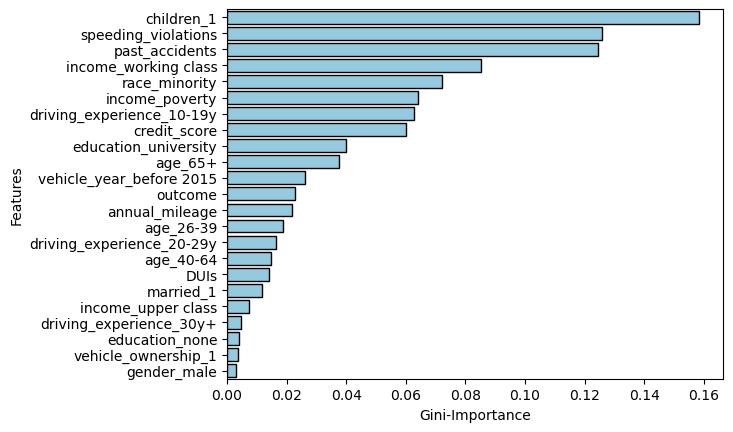

In [331]:
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue', edgecolor='k')
plt.show()

Наиболее важным признаком является наличие детей, влияние первых наиболее важных признаков на целевую переменную было видно также на корреляционной матрице.  
Лучшая модель для классификации - Random Forest с n_estimators=500, max_depth=8 и max_features="sqrt" (accuracy на тестовой выборке: 0.832, F1 = 0.72).